# CUSTOMER SEGMENTATION

## BASIC DATA CLEANING

In [1]:
# mporting necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import mutual_info_score, adjusted_rand_score

In [2]:
# importing dataset
c_df=pd.read_csv("customers.csv")
t_df=pd.read_csv("transactions.csv")

In [3]:
c_df

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [4]:
t_df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


In [5]:
# merging dtaset
df1 = t_df.merge(c_df[['CustomerID','Region','SignupDate']], on ='CustomerID')

In [6]:
# changing datatype
df1["TransactionDate"]=pd.to_datetime(df1["TransactionDate"])

In [7]:
#converting to date
df1["TransactionDate"]=df1["TransactionDate"].dt.date

In [8]:
#removing columns
df1=df1.drop(["Price","Quantity","TransactionID","CustomerID","ProductID"],axis=1)

In [9]:
#duplicate removing
df1.duplicated().sum()

0

In [10]:
# null finding
df1.isnull().sum()

TransactionDate    0
TotalValue         0
Region             0
SignupDate         0
dtype: int64

In [11]:
df1["TransactionDate"]=pd.to_datetime(df1["TransactionDate"])
df1["SignupDate"]=pd.to_datetime(df1["SignupDate"])

In [12]:
df1.dtypes

TransactionDate    datetime64[ns]
TotalValue                float64
Region                     object
SignupDate         datetime64[ns]
dtype: object

In [13]:
c_df

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [14]:
t_df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


In [15]:
# converting to days
df1["how_long_customer"]=(df1["TransactionDate"]-df1["SignupDate"]).dt.days

In [16]:
df1

,TransactionDate,TotalValue,Region,SignupDate,how_long_customer
0,2024-08-25,300.68,Europe,2022-12-03,631
1,2024-10-01,550.16,Europe,2022-12-03,668
2,2024-08-17,834.74,Europe,2022-12-03,623
3,2024-10-26,293.70,Europe,2022-12-03,693
4,2024-05-27,300.68,Asia,2024-09-04,-100
...,...,...,...,...,...
995,2024-01-07,32.16,South America,2023-03-04,309
996,2024-09-30,1252.11,South America,2023-03-04,576
997,2024-12-24,223.96,South America,2024-11-22,32
998,2024-12-09,995.52,Asia,2024-11-13,26


In [17]:
#finding customers with early transaction and later signup.wrong data
df1[df1["how_long_customer"]<0]

,TransactionDate,TotalValue,Region,SignupDate,how_long_customer
4,2024-05-27,300.68,Asia,2024-09-04,-100
6,2024-07-12,1011.66,Asia,2024-09-04,-54
7,2024-05-24,433.64,Asia,2024-09-04,-103
9,2024-02-08,337.91,Europe,2024-04-04,-56
12,2024-01-18,942.32,Europe,2024-04-04,-77
...,...,...,...,...,...
977,2024-03-06,257.00,South America,2024-04-11,-36
985,2024-01-28,396.34,North America,2024-01-30,-2
992,2024-01-31,599.86,Asia,2024-11-11,-285
993,2024-09-29,919.72,Asia,2024-11-11,-43


In [18]:
# dropping rows
df1 = df1.drop(df1[df1['how_long_customer'] < 0].index)

In [19]:
#dropping columns
df1=df1.drop(["TransactionDate","SignupDate","Region"],axis=1)

In [20]:
df1

,TotalValue,how_long_customer
0,300.68,631
1,550.16,668
2,834.74,623
3,293.70,693
5,824.82,105
...,...,...
994,396.34,4
995,32.16,309
996,1252.11,576
997,223.96,32


# CLUSTERING
**Here we are using K-Means Clustering**

*finding k- value*

In [21]:
#finding the ideal number of clusters by finding sum of square errors sse
sse=[]
k_range=range(1,10)
for i in k_range:
    km=KMeans(n_clusters=i)
    km.fit(df1)
    sse.append(km.inertia_)

C:\Users\Biji\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Biji\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Biji\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

In [22]:
sse

[259683986.15258223,
 114411165.62031285,
 82834267.22402143,
 59045700.054015175,
 46195099.063397594,
 37553331.77448931,
 33253773.98233214,
 29336336.873614363,
 26547810.37190954]

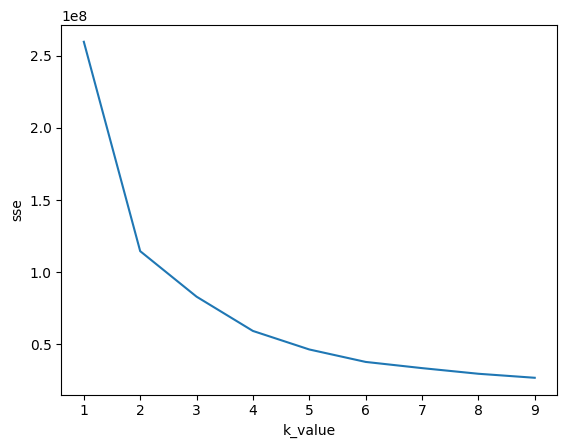

In [23]:
# plotting sum of square errors with corresponding iterated k value
plt.plot(k_range,sse)
plt.xlabel("k_value")
plt.ylabel("sse")
plt.show()

**take cluster k value as 4**

**K Means cluster Algorithm**

In [24]:
km=KMeans(n_clusters=4)
km.fit(df1)

C:\Users\Biji\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [25]:
# cluster prediction
ypred=km.predict(df1)

In [26]:
df1["cluster"]=ypred

In [27]:
df1

,TotalValue,how_long_customer,cluster
0,300.68,631,3
1,550.16,668,3
2,834.74,623,2
3,293.70,693,3
5,824.82,105,2
...,...,...,...
994,396.34,4,0
995,32.16,309,0
996,1252.11,576,1
997,223.96,32,0


In [28]:
df1["cluster"].unique()

array([3, 2, 0, 1])

# EXPLORATORY DATA ANALYSIS OF CLUSTERING(EDA)

<Axes: xlabel='cluster'>

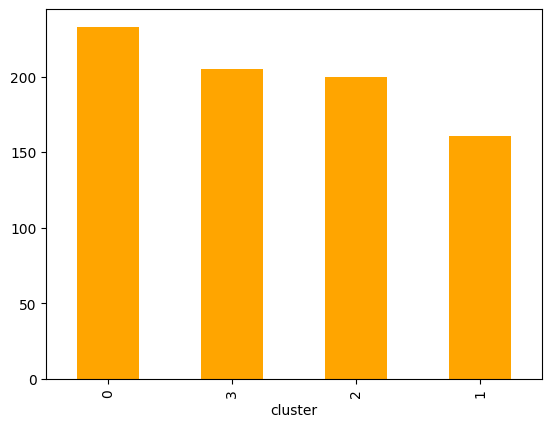

In [29]:
df1["cluster"].value_counts().plot(kind="bar",color='orange')

<Axes: xlabel='how_long_customer', ylabel='TotalValue'>

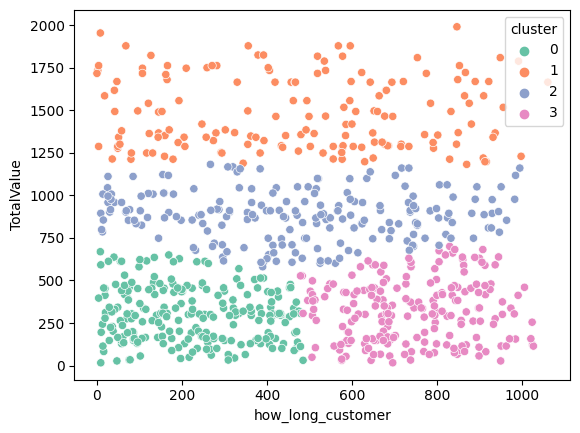

In [30]:
sns.scatterplot(data = df1,x=df1["how_long_customer"], y=df1["TotalValue"],hue=df1["cluster"],palette="Set2")

## Here 4 clusters are visible
* new customers with low spending is cluster 0
* high spending customers are cluster 1
* old customers with low spending is cluster 3
* customers with medium spending is cluster 2
* majority is cluster0-new customer low spending
* least is high spending customers

In [31]:
df_0=df1[df1["cluster"]==0]
df_1=df1[df1["cluster"]==1]
df_2=df1[df1["cluster"]==2]
df_3=df1[df1["cluster"]==3]

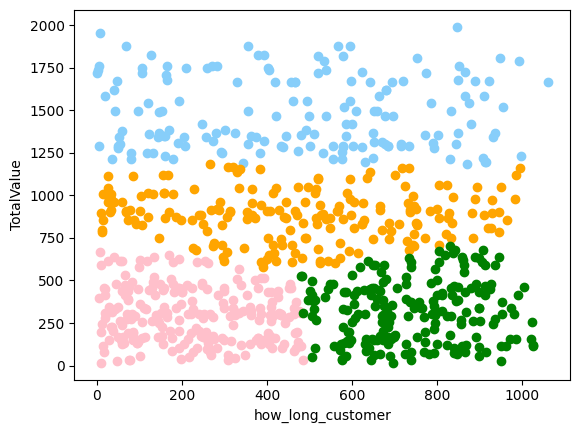

In [32]:
plt.scatter(df_0["how_long_customer"],df_0["TotalValue"],color="pink")
plt.scatter(df_1["how_long_customer"],df_1["TotalValue"],color="lightskyblue")
plt.scatter(df_2["how_long_customer"],df_2["TotalValue"],color="orange")
plt.scatter(df_3["how_long_customer"],df_3["TotalValue"],color="green")
plt.xlabel("how_long_customer")
plt.ylabel("TotalValue")
plt.show()

## EVALUATION OF CUSTOMER SEGMENTATION

In [33]:
# Calculate clustering metrics
sil = silhouette_score(df1, km.labels_)
db = davies_bouldin_score(df1, km.labels_)
ch = calinski_harabasz_score(df1, km.labels_)
ari = adjusted_rand_score(df1.cluster, km.labels_)
mi = mutual_info_score(df1.cluster, km.labels_)

# Print the metric scores
print("Silhouette Score:", round(sil,2))
print("Davies-Bouldin Index:", round(db,2))
print("Calinski-Harabasz Index:", round(ch,2))
print("Adjusted Rand Index:", round(ari,2))
print("Mutual Information (MI):", round(mi,2))

Silhouette Score: 0.4
Davies-Bouldin Index: 0.89
Calinski-Harabasz Index: 900.46
Adjusted Rand Index: 1.0
Mutual Information (MI): 1.38
